In [2]:
!git clone https://pattoken@github.com/sinhajiya/Face_Recognition_from_Features_using_Yale_Face_Database.git

Cloning into 'Face_Recognition_from_Features_using_Yale_Face_Database'...
remote: Enumerating objects: 1284, done.
remote: Counting objects: 100% (368/368), done.
remote: Compressing objects: 100% (265/265), done.
remote: Total 1284 (delta 120), reused 335 (delta 102), pack-reused 916 (from 1)
Receiving objects: 100% (1284/1284), 60.91 MiB | 17.60 MiB/s, done.
Resolving deltas: 100% (584/584), done.
Updating files: 100% (1168/1168), done.


In [3]:
!git config --global user.email "@gmail.com"
!git config --global user.name ""

## Importing and Initializing

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import os
from scipy.ndimage import convolve

In [5]:
data_dir = "/content/Face_Recognition_from_Features_using_Yale_Face_Database/data"
sample_img = "/content/Face_Recognition_from_Features_using_Yale_Face_Database/data/subject01.centerlight"
normalized_dir = "/content/Face_Recognition_from_Features_using_Yale_Face_Database/normalized_data"

In [ ]:
subject = []
emotions = ['centerlight', 'happy', 'leftlight', 'glasses', 'normal',
                'rightlight', 'sad', 'sleepy', 'surprised', 'wink','noglasses']
for i in range (1,16):
  subject.append(f"subject0{i}")

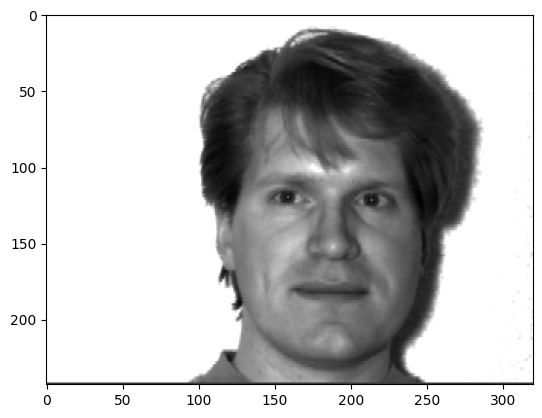

In [16]:
img = Image.open(sample_img)
plt.imshow(img, cmap="gray")
plt.show()

In [ ]:
type(img)

PIL.GifImagePlugin.GifImageFile

In [17]:
img_ndarray = np.asarray(img)
img_ndarray.shape

(243, 320)

In [ ]:
(img_ndarray.min(),img_ndarray.max())

(9, 255)

In [ ]:
def get_array(subject_id, expression, directory):
    target_filename = f"subject{subject_id}.{expression}"

    for filename in os.listdir(directory):
        if filename == target_filename:
            filepath = os.path.join(directory, filename)
            try:
                img = Image.open(filepath)
                img_ndarray = np.asarray(img)
                return img_ndarray

            except IOError:
                print(f"Cannot open file: {filepath}")

    print(f"File {target_filename} not found in directory.")
    return None

# Image Visualization and Preprocessing

1. Look at the data
2. Distribution of images and expressions.
3. Image Histogram (for pixel values)
4. Check if all of them are of same size. If not, resize.


## Data Visualization

In [ ]:
def show_data(subject_id):
    # Initialize list to store images.
    images = []
     # Load images for the specified subject
    for emotion in emotions:
        filename = f'subject{subject_id}.{emotion}'
        filepath = os.path.join(data_dir, filename)
        try:
            img = Image.open(filepath)  #Data type of img: PIL.GifImagePlugin.GifImageFile
            images.append(img)
        except FileNotFoundError:
            print(f"File not found: {filepath}")

    # Define the grid size for visualization
    grid_size = (3,4)

    # Create a new figure
    plt.figure(figsize=(15,12))

    # Plot each image
    for i, img in enumerate(images):
        plt.subplot(grid_size[0], grid_size[1], i + 1)
        plt.imshow(img, cmap='gray')  # Show image in grayscale
        plt.axis('off')
        plt.title(f'{emotions[i]}', fontsize=10)

    # Adjust layout and show plot
    plt.tight_layout()
    plt.suptitle(f"Images of Subject {subject_id}", fontsize=16)
    plt.subplots_adjust(top=0.9)  # Adjust title position
    plt.show()


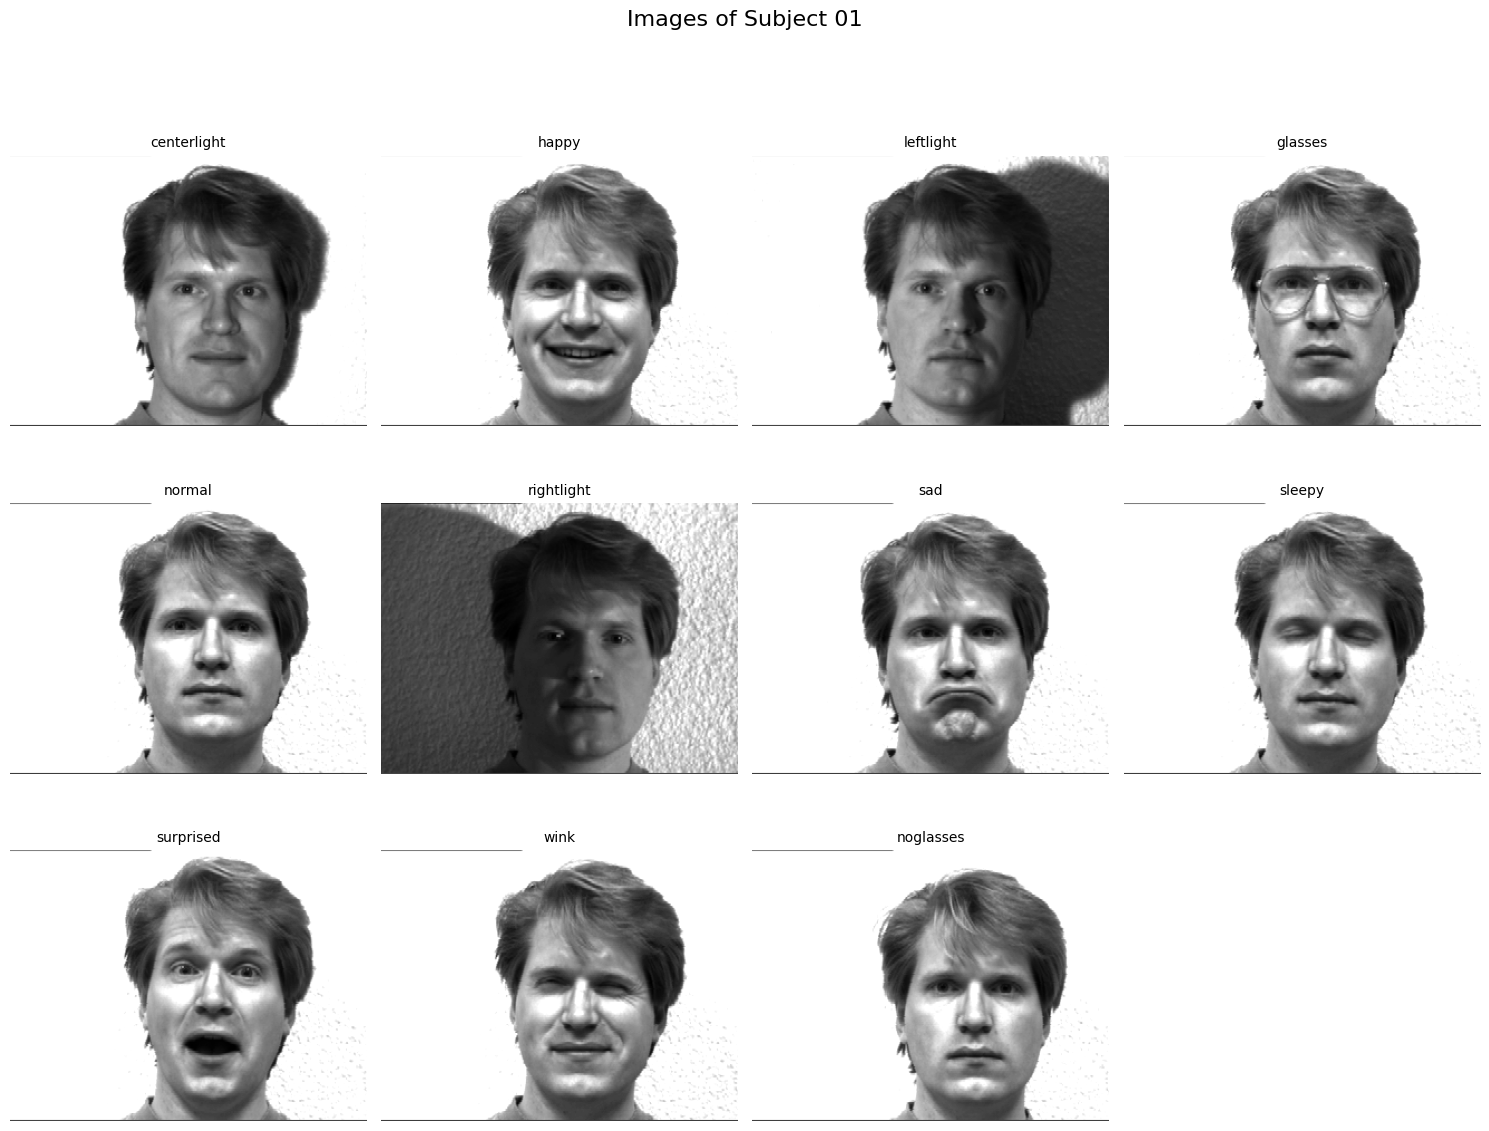

In [ ]:
show_data(subject_id='01')

## Distribution of data


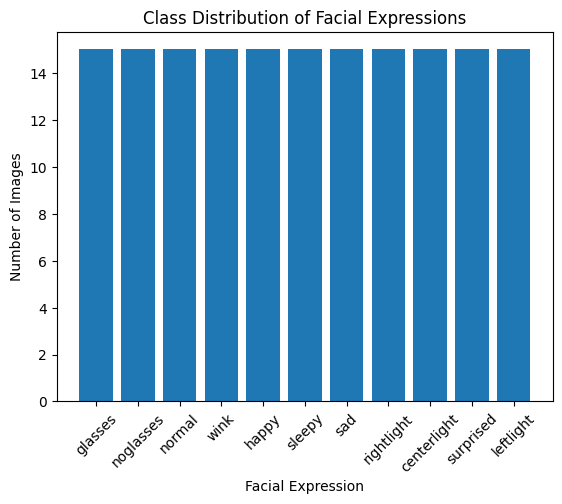

In [ ]:
expression_counts = {}

for filename in os.listdir(data_dir):
    expression = filename.split('.')[1]
    if expression in expression_counts:
        expression_counts[expression] += 1
    else:
        expression_counts[expression] = 1


plt.bar(expression_counts.keys(), expression_counts.values())
plt.xlabel('Facial Expression')
plt.ylabel('Number of Images')
plt.title('Class Distribution of Facial Expressions')
plt.xticks(rotation=45)
plt.show()


## Check if all the images are of same size

In [ ]:
def hasSameShape(directory):

    shape = set()  # Use a set to store unique sizes

    # Iterate over files in the directory
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        try:
            with Image.open(filepath) as img:
                img = np.asarray(img)
                shape.add(img.shape)  # Add size (width, height) to the set
        except IOError:
            print(f"Cannot open file: {filepath}")

    if len(shape) == 1:  #since sizes is a set, it will not store duplicates.
        # All images have the same size
        sh = shape.pop()  # Get the unique size
        print(f"All the images are of shape. \nThe shape is {sh}")
    else:
        # Images have different sizes
        return False, None



In [ ]:
hasSameShape(data_dir)

All the images are of shape. 
The shape is (243, 320)


## Normalization

Normalization helps improve the performance and convergence speed of machine learning algorithms.
Normalizing the pixel values to [0,1]

In [ ]:
def normalize_image(directory, output_directory):

    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        try:
            with Image.open(filepath) as img:
                img_ndarray = np.asarray(img, dtype=np.float32)
                img_ndarray = img_ndarray.copy()
                img_ndarray /= 255.0

            output_filepath = os.path.join(output_directory, f"{filename}.npy")
            np.save(output_filepath, img_ndarray)

        except IOError:
            print(f"Cannot open file: {filepath}")


    return True

This function normalizes the image and stores in the folder named normalized_dir.

In [ ]:
normalize_image(data_dir,normalized_dir)

True

### Opening Normalized Image

In [10]:
normalizedimg = np.load("/content/Face_Recognition_from_Features_using_Yale_Face_Database/normalized_data/subject01.centerlight.npy")

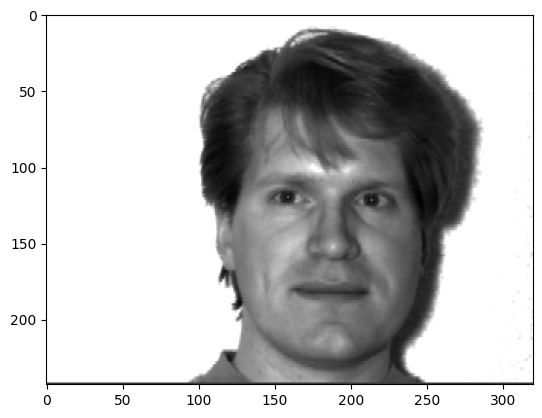

In [11]:
plt.imshow(normalizedimg,cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
(img_ndarray.min(),img_ndarray.max())

(9, 255)

## Histogram of Pixel Values of the image

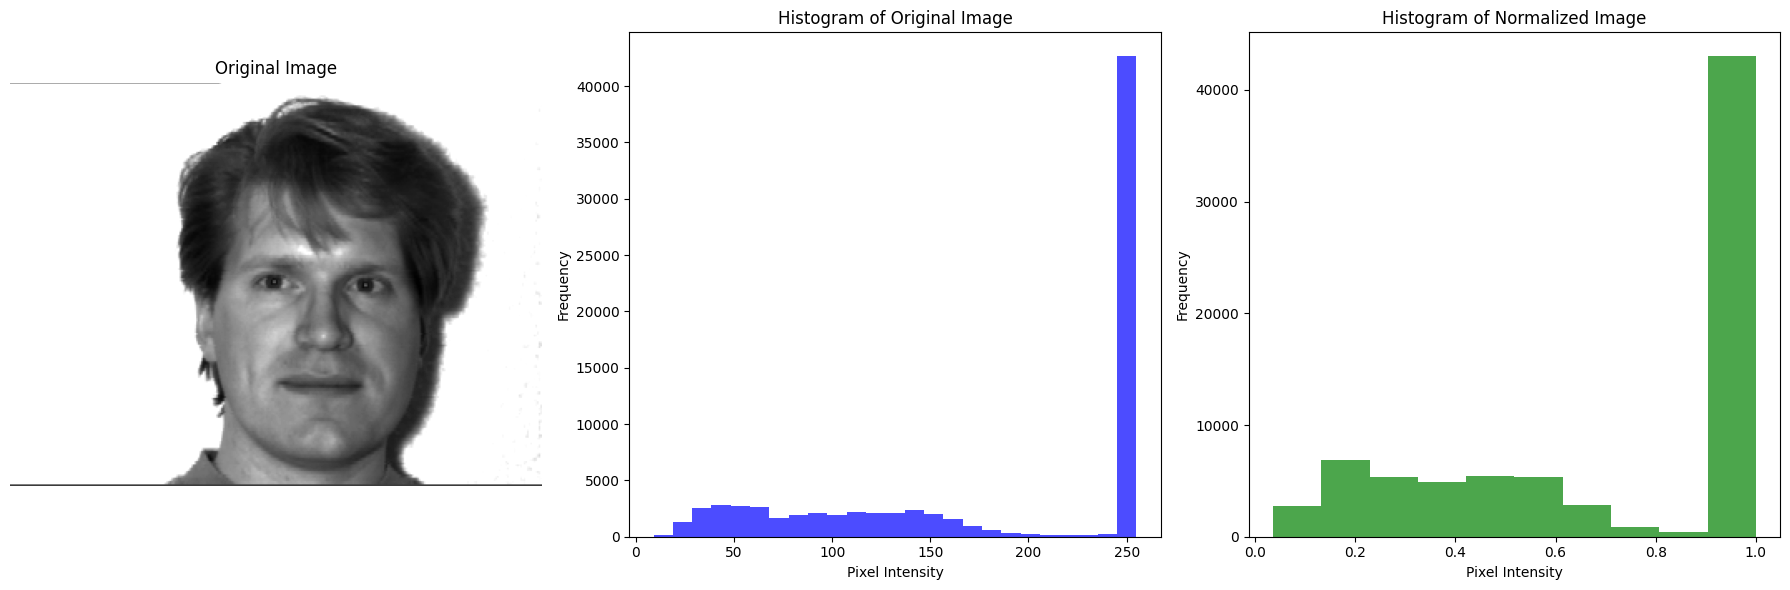

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Display the original image
axes[0].imshow(img_ndarray, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Histogram of original image
axes[1].hist(img_ndarray.ravel(), bins=25, color='blue', alpha=0.7)
axes[1].set_title("Histogram of Original Image")
axes[1].set_xlabel("Pixel Intensity")
axes[1].set_ylabel("Frequency")

# Histogram of normalized image

axes[2].hist(normalizedimg.ravel(), bins=10, color='green', alpha=0.7)
axes[2].set_title("Histogram of Normalized Image")
axes[2].set_xlabel("Pixel Intensity")
axes[2].set_ylabel("Frequency")

# Show plot
plt.tight_layout()
plt.show()

# Feature Extraction

1. Local Binary Pattern
2. Gabor filter
3. Laplacian of Gaussian (LoG)
4. Gray-Level Co-occurrence Matrix (GLCM)


## Local Binary Pattern

### Code

In [ ]:
from skimage.feature import local_binary_pattern
from skimage.transform import rotate
from skimage import data
from skimage.color import label2rgb

Each pixel of an image is labeled with an LBP code
which is obtained by converting the binary code into
decimal one.

In [ ]:
# Directories for LBP histograms and full LBP features
lbp_histogram_dir = "/content/Face_Recognition_from_Features_using_Yale_Face_Database/lbp_histogram"
lbp_array_dir = "/content/Face_Recognition_from_Features_using_Yale_Face_Database/lbp_array"
if not os.path.exists(lbp_histogram_dir):
    os.makedirs(lbp_histogram_dir)
if not os.path.exists(lbp_array_dir):
    os.makedirs(lbp_array_dir)

In [ ]:
radius = 1
n_points = 8

In [ ]:
# Function to extract LBP features as histogram and full LBP array
def lbp_features(image, radius, n_points):
    lbp = local_binary_pattern(image, n_points, radius, method="uniform")
    #uniform method reduces the number of patterns by focusing on those with limited transitions.
# Extract histogram of LBP patterns to make feature vectors comparable, independent of image size.
    n_bins = int(lbp.max() + 1)
    # . ravel(): Flattens the LBP array to a 1D array
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins))
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)
    return lbp, lbp_hist

In [ ]:
# Process all files in the normalized_data directory
i=0
for filename in os.listdir(normalized_dir):
    if filename.endswith(".npy"):
        file_path = os.path.join(normalized_dir, filename)
        image = np.load(file_path)

        # Extract LBP features
        lbp, lbp_hist = lbp_features(image, radius = radius, n_points = n_points)

        # Save the LBP histogram
        lbp_hist_path = os.path.join(lbp_histogram_dir, f"{filename}_lbp_hist.npy")
        np.save(lbp_hist_path, lbp_hist)

        # Save the full LBP feature array
        lbp_full_path = os.path.join(lbp_array_dir, f"{filename}_lbp.npy")
        np.save(lbp_full_path, lbp)
        i+=1
        print(f"Processed and saved LBP histogram and full LBP array for {filename}")
print(f"Total {i} files stored")

In [ ]:
lbp_img = np.load("/content/Face_Recognition_from_Features_using_Yale_Face_Database/lbp_array/subject01.centerlight.npy_lbp.npy")
print(f"The shape of original image is {img_ndarray.shape}")
print(f"The shape of LBP features of an image is {lbp_img.shape}")

The shape of original image is (243, 320)
The shape of LBP features of an image is (243, 320)


The shape of the LBP feature array (243, 320) matches the original image shape because the local_binary_pattern function applies the LBP transformation pixel by pixel, producing an LBP value for each pixel in the image.

In [ ]:
lbp_hist = np.load('/content/Face_Recognition_from_Features_using_Yale_Face_Database/lbp_histogram/subject01.centerlight.npy_lbp_hist.npy')

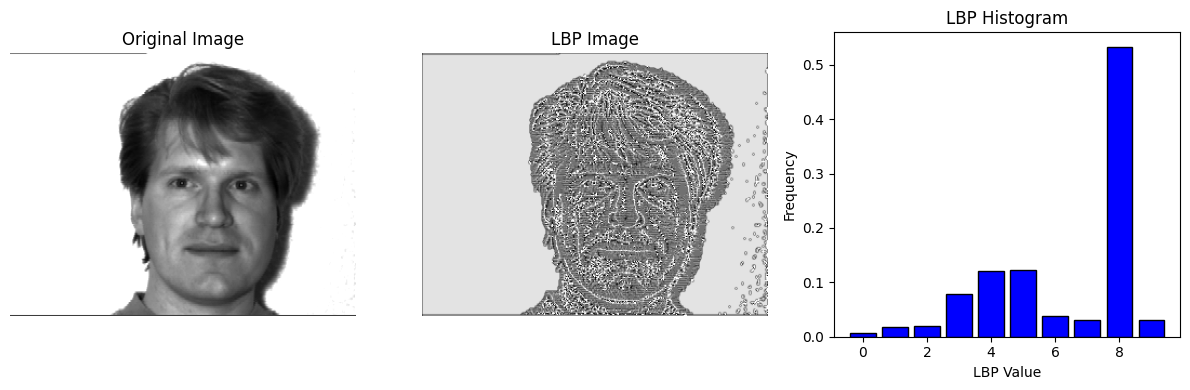

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Display the original image
axes[0].imshow(img_ndarray, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Display the LBP image
axes[1].imshow(lbp_img, cmap='gray')
axes[1].set_title("LBP Image")
axes[1].axis('off')

n_bins = len(lbp_hist)
axes[2].bar(range(n_bins), lbp_hist, color='blue', edgecolor='black')
axes[2].set_title("LBP Histogram")
axes[2].set_xlabel("LBP Value")
axes[2].set_ylabel("Frequency")


# Show plot
plt.tight_layout()
plt.show()

In [ ]:
'''overlay_labels highlights areas with specific LBP values
(representing textures like edges, corners, or flat regions) and helps understand where these patterns appear within the image.
'''

def overlay_labels(image, lbp, labels, alpha=0.5):
  # Create a mask that highlights areas where LBP matches any of the given labels
    mask = np.logical_or.reduce([lbp == each for each in labels])
  # Overlay the mask on the original image with transparency
    return label2rgb(mask, image=image, bg_label=0, alpha=alpha)

In [ ]:
def highlight_bars(bars, indexes):
    for i in indexes:
        bars[i].set_facecolor('r')

In [ ]:
def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(
        lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins), facecolor='0.5'
    )

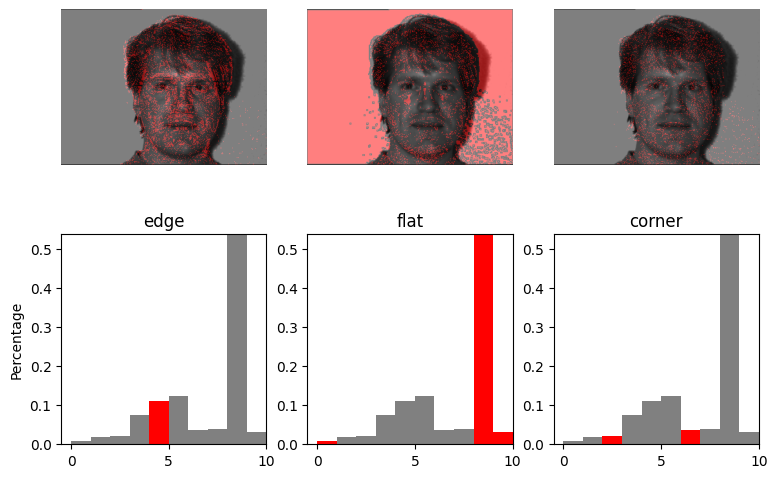

In [ ]:
# plot histograms of LBP of textures
fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
plt.gray()

titles = ('edge', 'flat', 'corner')
w = width = radius - 1

edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)  # LBP values representing edges

flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))   # Values for flat areas

i_14 = n_points // 4  # 1/4th of the histogram
i_34 = 3 * (n_points // 4)  # 3/4th of the histogram

corner_labels = list(range(i_14 - w, i_14 + w + 1)) + list(
    range(i_34 - w, i_34 + w + 1)
) # Values for corners

label_sets = (edge_labels, flat_labels, corner_labels)

for ax, labels in zip(ax_img, label_sets):
    ax.imshow(overlay_labels(img_ndarray, lbp, labels, alpha=0.5))

for ax, labels, name in zip(ax_hist, label_sets, titles):
    counts, _, bars = hist(ax, lbp)
    highlight_bars(bars, labels)
    ax.set_ylim(top=np.max(counts[:-1]))
    ax.set_xlim(right=n_points + 2)
    ax.set_title(name)

ax_hist[0].set_ylabel('Percentage')
for ax in ax_img:
    ax.axis('off')

## Gabor Filter

### Theory

A **Gabor filter** is a linear convolution filter that combines a **Gaussian function** (providing a spatial weighting) with a **sinusoidal plane wave** (defining the oscillatory component). It is widely used for edge and texture detection due to its ability to capture both spatial localization (via the Gaussian) and frequency (via the sinusoid).

- The **Gaussian component** controls the smoothness and localization of the filter, ensuring that nearby pixels contribute more heavily to the response.
- The **sinusoidal component** introduces the oscillations that make the filter sensitive to specific frequencies and orientations.

This filter can capture edge information in different orientations and scales by adjusting parameters such as frequency and orientation. Specifically:
- **At theta = 90°**, the filter detects **vertical edges**.
- **At theta = 45°**, it detects **diagonal edges** at that angle.

**Gabor filters are well-suited to tasks like texture analysis** and **feature extraction** because they can capture variations in intensity (grayscale pixel values) across multiple orientations and scales. They are especially effective for analyzing **local structure** and **directionality** in images, providing a detailed representation of spatial frequency content.



**Spatial Aspect Ratio (γ)**  refers to the ellipticity or shape of the Gaussian envelope of the filter. It controls how stretched or squashed the filter is in one direction compared to another.
It helps control the shape of the Gabor filter, which is useful when detecting specific features in an image.
Elongated Gabor filters can be tuned to detect edges or textures in a particular direction with higher sensitivity.
Circular Gabor filters are more general-purpose and work equally well in all directions.

**λ (Wavelength)**: Defines the distance over which the sine wave repeats, controlling the scale of the filter. Smaller λ detects finer details, while larger λ captures coarser patterns.
**θ (Orientation):** Specifies the direction of the filter's sensitivity, determining which edges or patterns (horizontal, vertical, or diagonal) will be detected.

**ψ (Phase Offset):** Shifts the sine wave, affecting the alignment of the filter. It controls whether the Gabor filter detects features like edges or textures with varying light and dark regions.

At ψ = 0, the wave starts at the zero-crossing point (similar to a cosine wave). The filter will primarily detect even-symmetric features, such as edges where there is a clear transition from dark to light or vice versa (e.g., vertical and horizontal edges).

At ψ = π/2, the wave starts at its peak or trough (similar to a sine wave). The filter will primarily detect odd-symmetric features, such as transitions where there is an alternation of light and dark regions (e.g., texture patterns with stripes).

**σ (Standard Deviation):** Determines the width of the Gaussian envelope, controlling how localized or spread out the filter is in space. A larger σ makes the filter broader and captures larger features.

### Code

In [12]:
from skimage.filters import gabor_kernel

In [13]:
# Define parameters
lambdas = [10, 20, 30]  # Wavelengths
thetas = [0, np.pi/4, np.pi/2]  # Orientations
psi = 0    # Phase offset
sigma = 4  # Standard deviation
gamma = 0.5 # Spatial aspect ratio

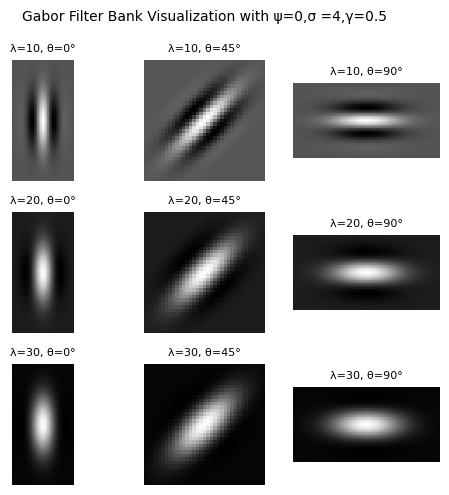

In [ ]:
# Create a figure to display the filters
fig, axes = plt.subplots(3, 3, figsize=(5,5))
fig.suptitle(f"Gabor Filter Bank Visualization with ψ={psi},σ ={sigma},γ={gamma}", fontsize=10)

# Loop through each wavelength and orientation to generate and display filters
for i, wavelength in enumerate(lambdas):
    for j, theta in enumerate(thetas):
        gabor_kern = gabor_kernel(frequency=1.0/wavelength, theta=theta, sigma_x=sigma, sigma_y=sigma/gamma, offset=psi)

        # Plot the real part of the Gabor filter
        ax = axes[i, j]
        ax.imshow(np.real(gabor_kern), cmap='gray')
        ax.set_title(f"λ={wavelength}, θ={np.degrees(theta):.0f}°",fontsize=8)
        ax.axis('off')

plt.tight_layout()
plt.show()


In [14]:
def extract_gabor(image, lambdas=lambdas, thetas=thetas,visualize=False):
# Iterates over each combination of wavelength (lambdas) and orientation (thetas).
# For each combination, a Gabor kernel is created using gabor_kernel() with specific parameters for frequency, orientation (theta), and standard deviations (sigma_x and sigma_y).
# The kernel is convolved with the input image using convolve() to get the filtered output.
# The mean and variance of the real part of the convolved image are calculated and appended as features.

    features = []
    conv_results = []  # List to store the convolution results for visualization

    for wavelength in lambdas:
        for theta in thetas:
            gabor_kern = gabor_kernel(frequency=1.0/wavelength,theta=theta, sigma_x=sigma,sigma_y=sigma/gamma,offset=psi)

            # Apply the filter to the image
            conv_result = convolve(image, np.real(gabor_kern))
            conv_results.append(conv_result)  # Store for visualization


            # Extract mean and variance of the filter responses as features
            mean_real = np.mean(conv_result)
            var_real = np.var(conv_result)

            features.append(mean_real)
            features.append(var_real)

    if visualize:
        return np.array(features), conv_results
    else:
        return np.array(features)


In [ ]:
gabor_dir = "/content/Face_Recognition_from_Features_using_Yale_Face_Database/gabor_features"
if not os.path.exists(gabor_dir):
    os.makedirs(gabor_dir)

In [ ]:
for filename in os.listdir(normalized_dir):
    if filename.endswith(".npy"):
        file_path = os.path.join(normalized_dir, filename)
        image = np.load(file_path)
        gabor_features = extract_gabor(image)

        gabor_save_path = os.path.join(gabor_dir, f"{filename}_gabor.npy")
        np.save(gabor_save_path, gabor_features)

In [18]:
gabor_features = np.load('/content/Face_Recognition_from_Features_using_Yale_Face_Database/gabor_features/subject01.centerlight.npy_gabor.npy')
print(f"The shape of original image is {img_ndarray.shape}")
print(f"The shape of Gabor Features of the image is {gabor_features.shape}")

The shape of original image is (243, 320)
The shape of Gabor Features of the image is (18,)


18 values of mean and variance (9 each) for each combination of wavelength and thetas.

For facial recognition, these features provide rich information about the spatial frequency and directionality of face textures, making them robust to variations in lighting and facial orientation.

For a Gabor filter with a specific orientation (say 45°) and frequency, the mean might tell you how strong the edges are in that direction (e.g., how prominent the facial features like the jawline or cheekbones are).

The variance could tell you how much variability or detail exists along that edge (e.g., smooth jawline vs. a more detailed texture in the region of wrinkles).

### Visualize

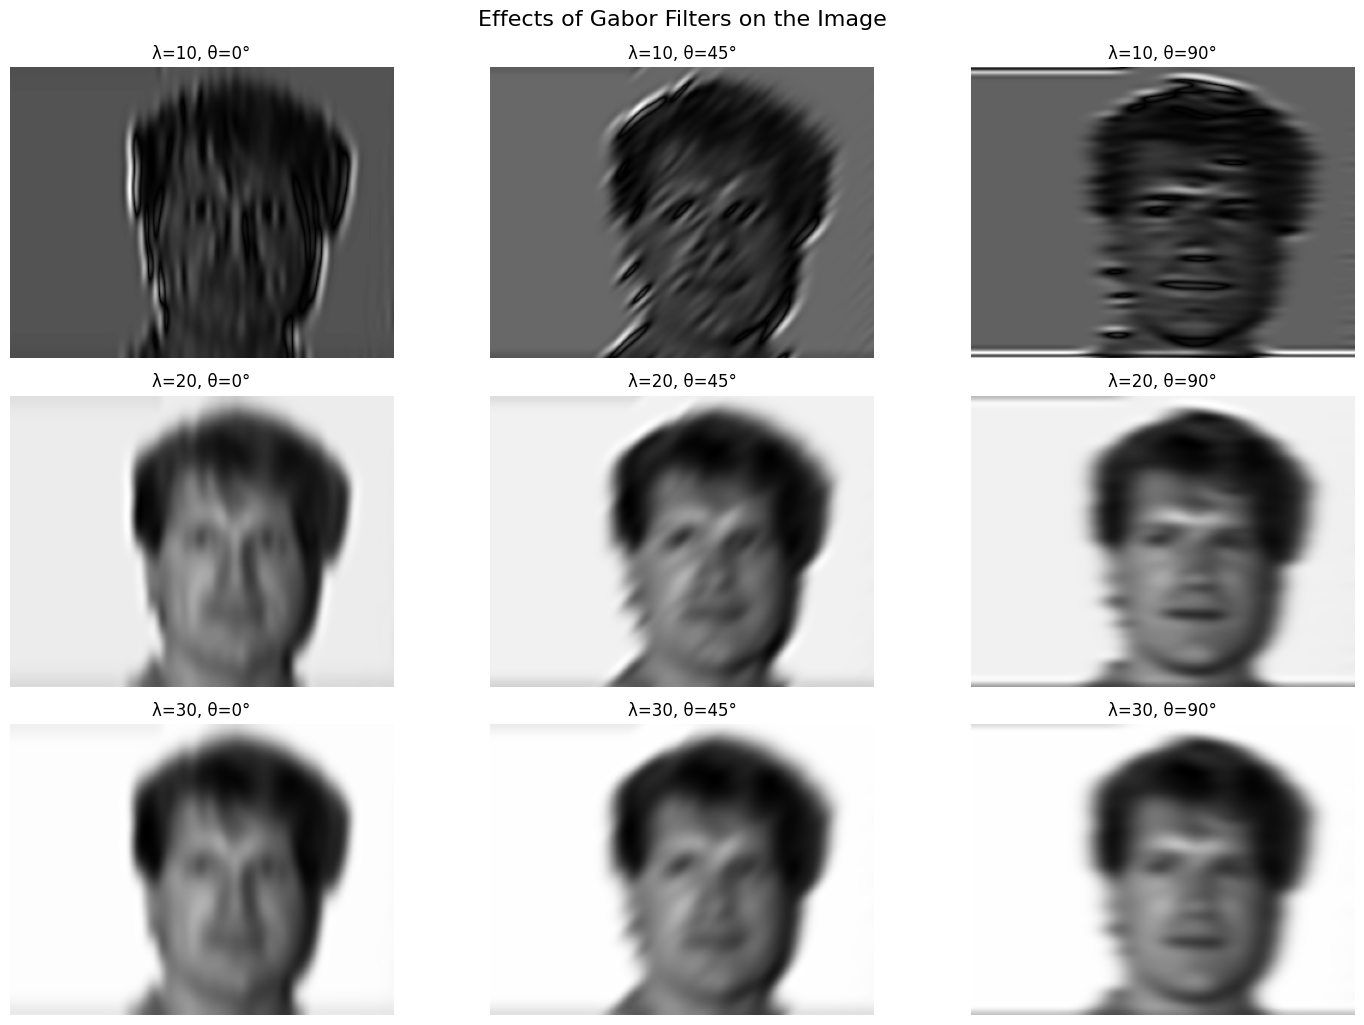

In [ ]:
_, gabor_imgs = extract_gabor(normalizedimg, visualize=True)

# Visualize all the filtered results
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
lambdas = [10, 20, 30]
thetas = [0, np.pi/4, np.pi/2]

for i, ax in enumerate(axes.flat):
    ax.imshow(np.abs(gabor_imgs[i]), cmap='gray')
    wavelength = lambdas[i // 3]
    theta = thetas[i % 3]
    ax.set_title(f"λ={wavelength}, θ={np.degrees(theta):.0f}°")
    ax.axis('off')

# Adjust layout for better visualization
plt.tight_layout()
plt.suptitle("Effects of Gabor Filters on the Image", fontsize=16, y=1.02)
plt.show()


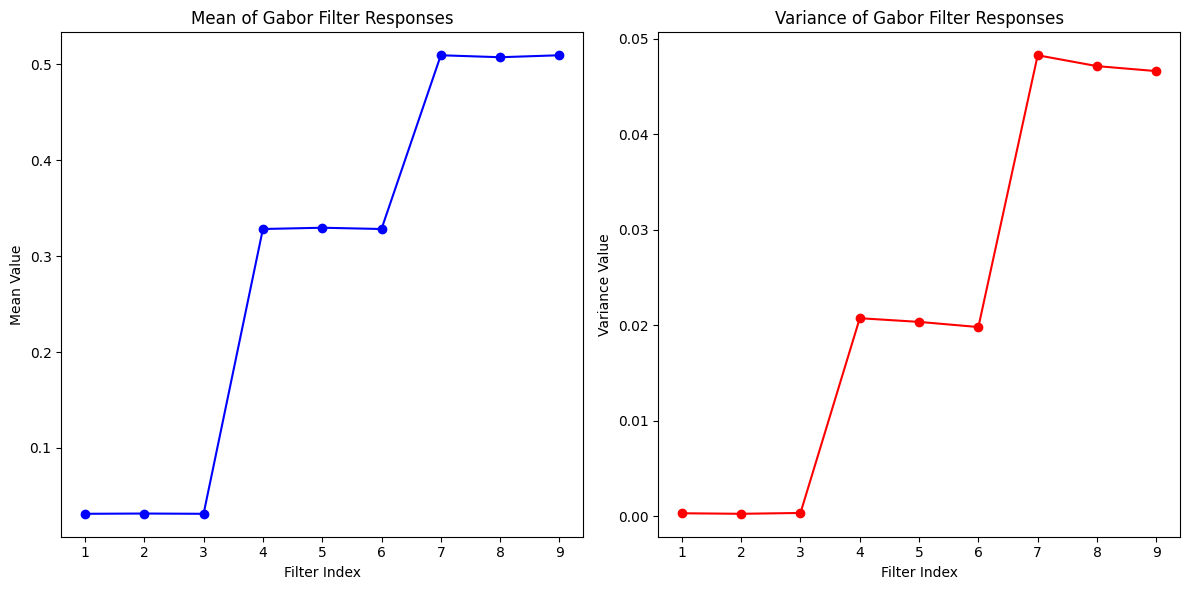

In [ ]:
# Assuming each Gabor filter output was summarized by its mean and variance
num_filters = len(gabor_features) // 2  # Dividing by 2 because each filter has mean and variance
means = gabor_features[::2]
variances = gabor_features[1::2]

# Create x indices starting from 1
x_indices = range(1, num_filters + 1)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plotting means as a line plot
ax[0].plot(x_indices, means, marker='o', linestyle='-', color='b')
ax[0].set_title("Mean of Gabor Filter Responses")
ax[0].set_xlabel("Filter Index")
ax[0].set_ylabel("Mean Value")
ax[0].set_xticks(x_indices)  # Display all integer values on x-axis

# Plotting variances as a line plot
ax[1].plot(x_indices, variances, marker='o', linestyle='-', color='r')
ax[1].set_title("Variance of Gabor Filter Responses")
ax[1].set_xlabel("Filter Index")
ax[1].set_ylabel("Variance Value")
ax[1].set_xticks(x_indices)  # Display all integer values on x-axis

plt.tight_layout()
plt.show()
